## Multi-VWAP

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
df_ohlcv = pd.read_parquet(f"data/US30_1Minute_2025_cT.parquet")
df_ohlcv.head(5)
len(df_ohlcv)

,open,high,low,close,volume
datetime,,,,,
2025-05-15 00:00:00,41838.7,41846.1,41833.8,41846.1,142.0
2025-05-15 00:01:00,41845.1,41853.3,41843.8,41852.1,90.0
2025-05-15 00:02:00,41853.5,41858.6,41853.5,41855.1,96.0
2025-05-15 00:03:00,41856.6,41856.6,41852.5,41855.5,54.0
2025-05-15 00:04:00,41855.3,41855.3,41852.8,41853.5,32.0


2631

In [3]:
from multi_vwap import MultiVwap, BandsFilter, BandsType

vwap = MultiVwap(df_ohlcv)

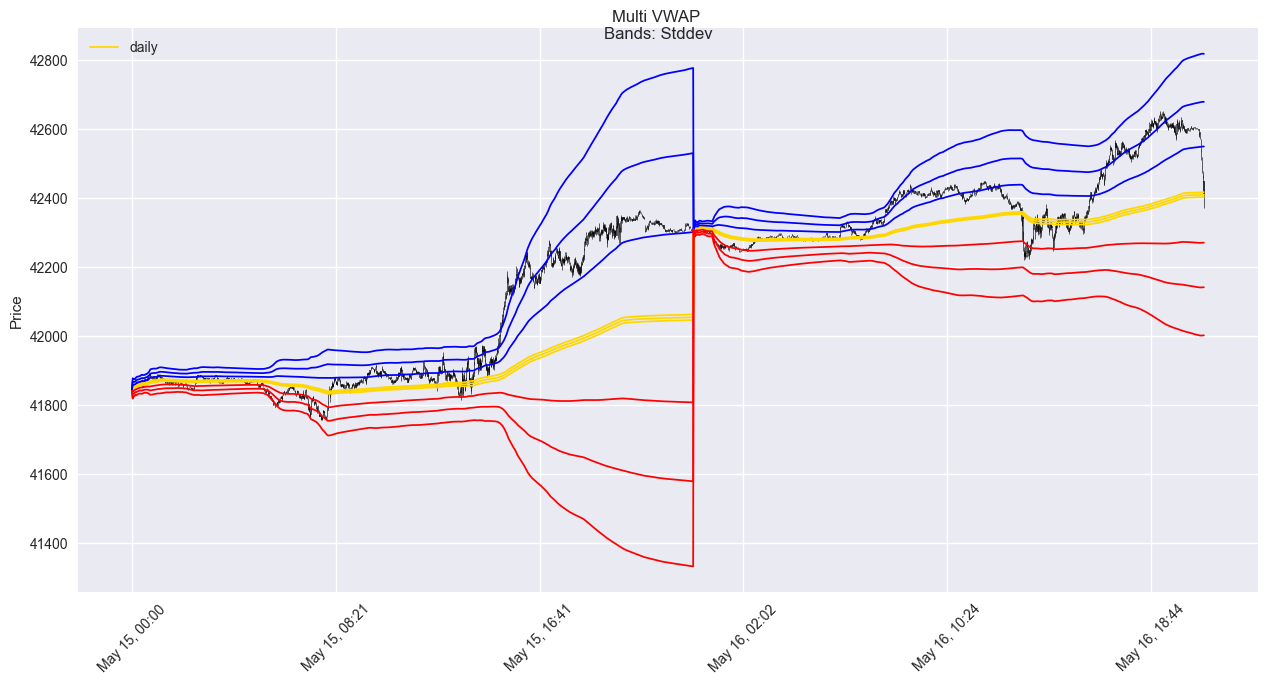

In [4]:
filter = BandsFilter(BandsType.Stddev, volume_weighted=False)
vwap.plot(bands_at='daily', bands_filter=filter, show_weekly=False)

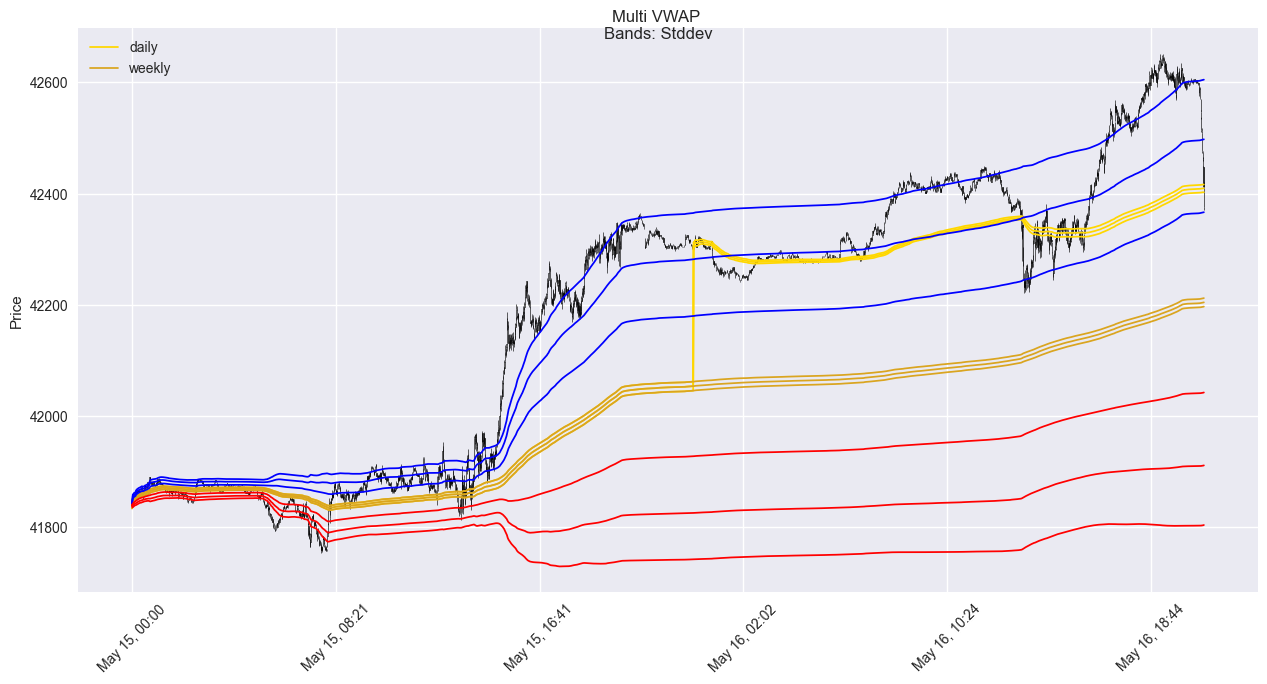

In [5]:
filter = BandsFilter(BandsType.Stddev, volume_weighted=True, multipliers=(0.68, 1.23, 1.68))
vwap.plot(bands_at='weekly', show_weekly=True, bands_filter=filter)

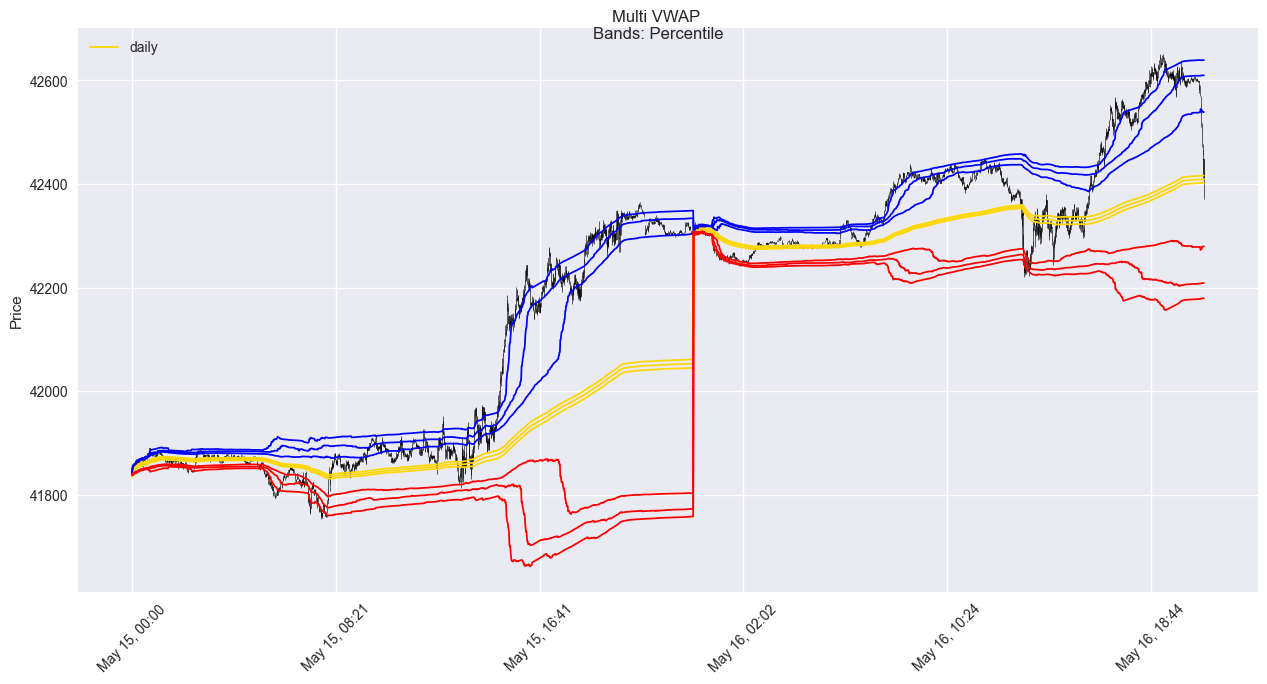

In [6]:
filter = BandsFilter(BandsType.Percentile,volume_weighted=True, pctile=(70, 85, 95))
vwap.plot(bands_at='daily', bands_filter=filter)
# Yeah, some exotic lines.

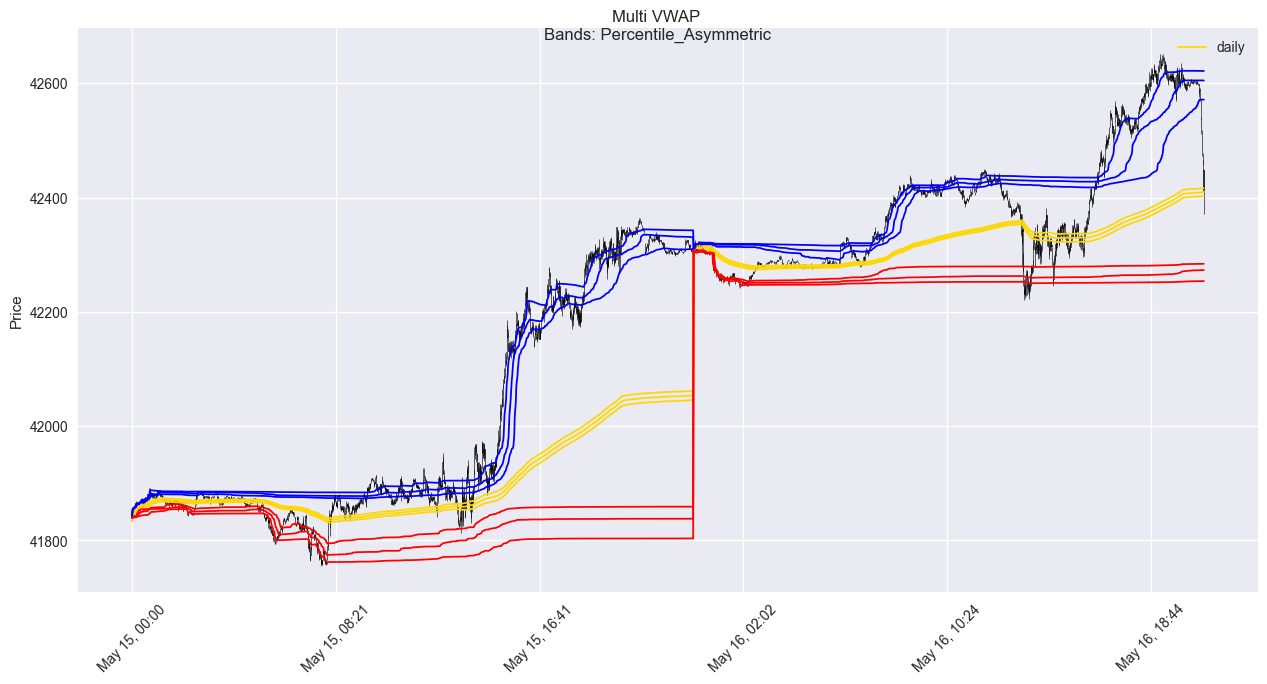

In [7]:
filter = BandsFilter(BandsType.Percentile_Asymmetric, volume_weighted=False)
vwap.plot(bands_at='daily', bands_filter=filter)

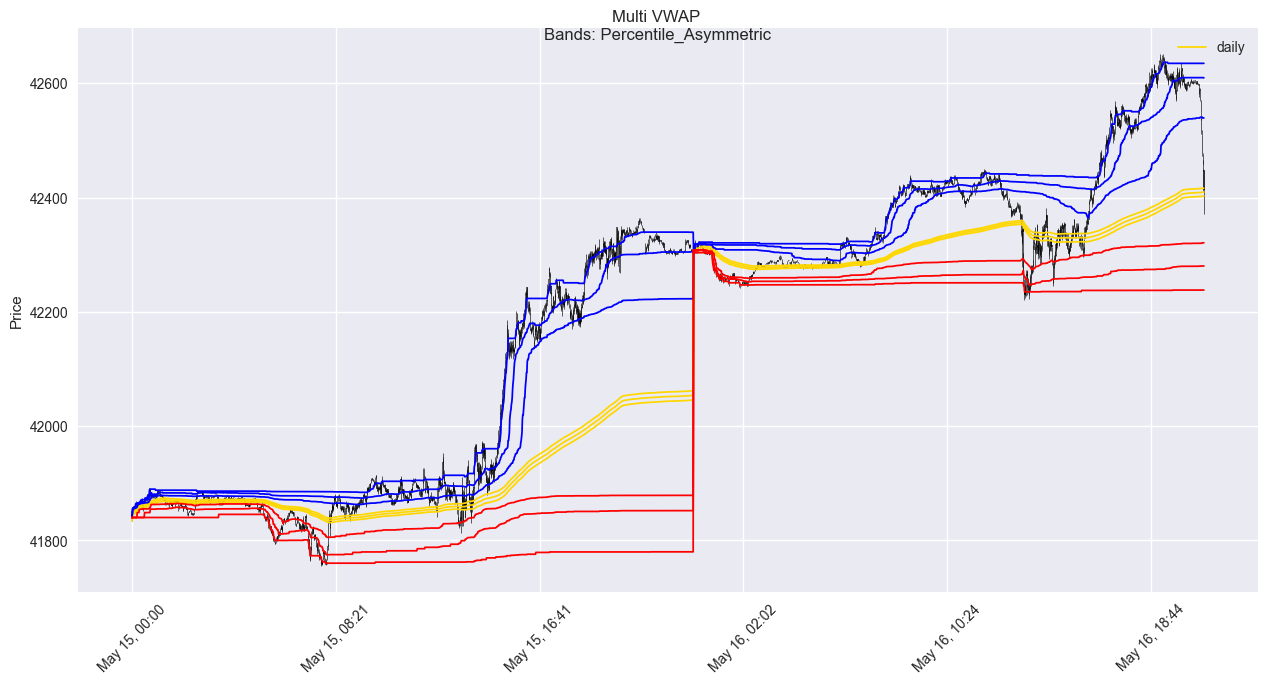

In [8]:
filter = BandsFilter(BandsType.Percentile_Asymmetric, volume_weighted=True,
                    pctile_up=(50, 80, 97), pctile_down=(50, 80, 97))
vwap.plot(bands_at='daily', bands_filter=filter)

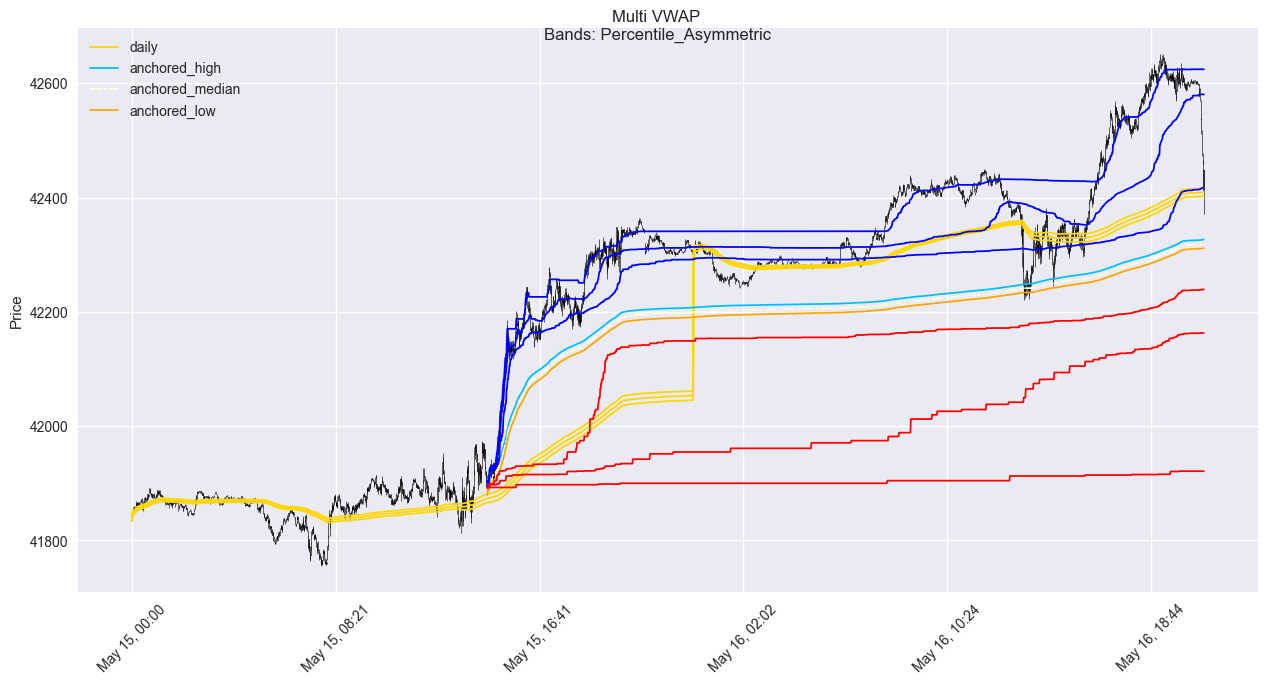

In [9]:
filter = BandsFilter(BandsType.Percentile_Asymmetric, volume_weighted=True,
                    pctile_up=(50, 80, 97), pctile_down=(50, 80, 97))
vwap.plot(date='2025-05-15 14:33:00', bands_at='anchored', bands_filter=filter)